# Task

DIY task in section B

In [3]:
%matplotlib inline

import os
import pandas as pd
import seaborn as sns

## Assignment
1. Obtain the minimum number of civilian casualties (in what month was that?)
2. How many NATO casualties were registered in August 2008?
3. What is the month with the most total number of casualties?
4. Can you make a plot of the distribution of casualties over time?

In [4]:
url = ("https://docs.google.com/spreadsheets/d/"\
       "1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/"\
       "export?format=csv&gid=1")
url

'https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/export?format=csv&gid=1'

In [5]:
db = pd.read_csv(url, skiprows=[0, -1], thousands=",")

## Inspecting data

In [6]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            72 non-null     float64
 1   Month                           73 non-null     object 
 2   Taliban                         72 non-null     float64
 3   Civilians                       73 non-null     int64  
 4   Afghan forces                   71 non-null     float64
 5   Nato (detailed in spreadsheet)  67 non-null     float64
 6   Nato - official figures         72 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 4.1+ KB


In [57]:
db.head()

,Year,Month,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures,Total
0,2004.0,January,15.0,51,23.0,NaN,11.0,100.0
1,2004.0,February,NaN,7,4.0,5.0,2.0,18.0
2,2004.0,March,19.0,2,NaN,2.0,3.0,26.0
3,2004.0,April,5.0,3,19.0,NaN,3.0,30.0
4,2004.0,May,18.0,29,56.0,6.0,9.0,118.0


In [58]:
db.describe()

,Year,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures,Total
count,72.00000,71.000000,72.000000,70.000000,66.000000,72.000000,72.000000
mean,2006.50000,218.408451,55.888889,54.571429,17.378788,19.861111,360.111111
std,1.71981,209.187515,44.035375,39.370250,17.427445,17.678112,297.011004
min,2004.00000,5.000000,2.000000,2.000000,1.000000,1.000000,18.000000
25%,2005.00000,50.000000,24.250000,23.250000,4.250000,6.750000,137.250000
50%,2006.50000,161.000000,48.500000,49.500000,13.500000,17.000000,296.500000
75%,2008.00000,315.500000,72.250000,72.250000,23.750000,27.250000,496.500000
max,2009.00000,945.000000,206.000000,190.000000,90.000000,77.000000,1271.000000


## 1. Minimum number of casualties

In [8]:
print(f"The minimum number of civilian casualties was {db['Civilians'].min()} and that was in {db.loc[db['Civilians']==db['Civilians'].min()]['Month'].values[0]}.")

The minimum number of civilian casualties was 2 and that was in March.


## 2. NATO casualties in August 2008

In [9]:
NATOaug2008 = db.loc[(db['Month'] == "August") & \
                   (db['Year'] == 2008), 'Nato - official figures'].values[0]

In [10]:
print(f"There were {NATOaug2008} NATO casualties in August 2008.")

There were 46.0 NATO casualties in August 2008.


## 3. Month with greatest casualties

In [11]:
totalCasualties = db.loc[:,'Taliban':].sum(axis=1)

In [12]:
db['Total'] = totalCasualties
db.head()

,Year,Month,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures,Total
0,2004.0,January,15.0,51,23.0,NaN,11.0,100.0
1,2004.0,February,NaN,7,4.0,5.0,2.0,18.0
2,2004.0,March,19.0,2,NaN,2.0,3.0,26.0
3,2004.0,April,5.0,3,19.0,NaN,3.0,30.0
4,2004.0,May,18.0,29,56.0,6.0,9.0,118.0


In [13]:
print(f"The greatest number of total casualties, {db['Total'].max()}, was in {db.loc[db['Total']==db['Total'].max()]['Month'].values[0]}.")

The greatest number of total casualties, 24498.0, was in 24498.


Clearly, something is off, because we were expecting a month. Let's inspect the data

In [14]:
db.loc[db['Total']==db['Total'].max()]

,Year,Month,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures,Total
72,NaN,24498,15507.0,4024,3820.0,1147.0,NaN,24498.0


Here we see that the month with the greatest number of casualties is numeric and has no year. Let's remove that row and check which month has the greatest number of casualties

In [15]:
db.drop(db[db['Total']==db['Total'].max()].index, inplace=True)

In [16]:
print(f"Now, if we inspect the data, the greatest number of total casualties, {db['Total'].max()}, was in {db.loc[db['Total']==db['Total'].max()]['Month'].values[0]}.")

Now, if we inspect the data, the greatest number of total casualties, 1271.0, was in September.


## 4. Plotting casualties over time

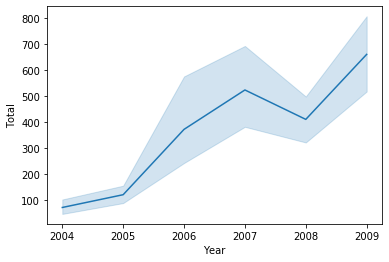

In [21]:
_ = sns.lineplot(x=db['Year'], y = db['Total'])

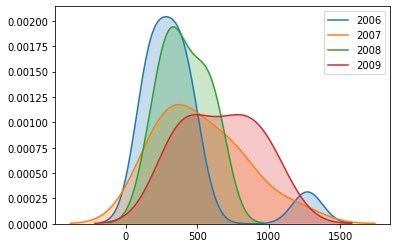

In [66]:
fig, ax = plt.subplots()

sns.kdeplot(db['Total'][db['Year']==2006], shade=True, ax=ax, label="2006")
sns.kdeplot(db['Total'][db['Year']==2007], shade=True, ax=ax, label="2007")
sns.kdeplot(db['Total'][db['Year']==2008], shade=True, ax=ax, label="2008")
sns.kdeplot(db['Total'][db['Year']==2009], shade=True, ax=ax, label="2009")